Exploratory Data Analysis
Netflix analysis

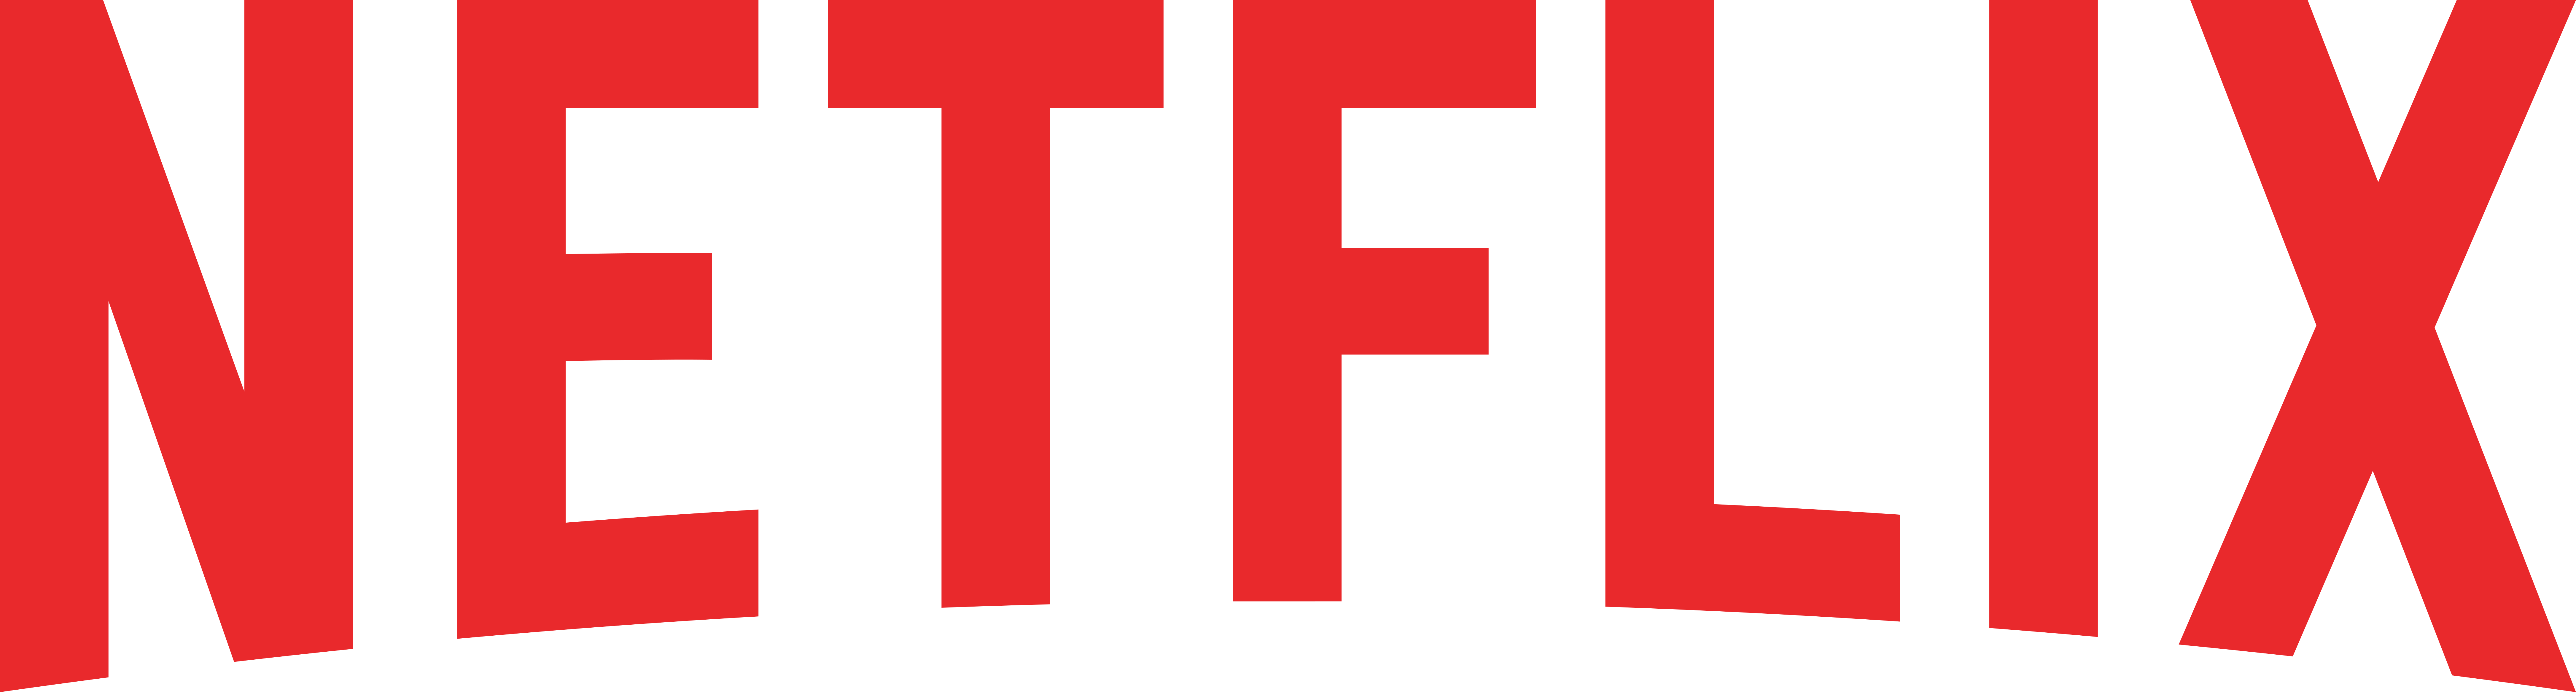

In [1]:
from IPython.display import Image
display(Image(filename='netflix.png'))



Netflix, Inc. is an American media company based in Los Gatos, California. Founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, it operates the over-the-top subscription video on-demand service Netflix brand, which includes original films and television series commissioned or acquired by the company, and third-party content licensed from other distributors. Netflix is a member of the Motion Picture Association—having become the first streaming company to become a member.



Next steps are necessary to download a dataset from opendatasets also Kaggle account is required.

In [2]:
#dataset containing data about Netflix movies and series
dataset_url = 'https://www.kaggle.com/datasets/dgoenrique/netflix-movies-and-tv-shows?select=titles.csv'

In [8]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\netflix-movies-and-tv-shows" (use force=True to force download)


In [9]:
data_dir = 'netflix-movies-and-tv-shows'

In [10]:
import os
os.listdir(data_dir)

['credits.csv', 'titles.csv']

Data Preparation and Cleaning
This dataset is looking really good and pretty clean.

In [11]:

import pandas as pd
netflix_df = pd.read_csv('netflix-movies-and-tv-shows/titles.csv')
netflix_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,MOVIE,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",['KW'],NaN,NaN,NaN,NaN,3.351,2.000
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],['TR'],NaN,tt26349328,7.9,209.0,2.450,7.200
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],['US'],NaN,tt21033382,6.1,91.0,1.960,NaN
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],['NG'],NaN,tt14922926,5.2,18.0,1.357,4.000


Firstly I changed csv into dataframe using pandas library. Then I checked general info about this dataset using .counts() and .info() and calculate some easy statistics using .describes().

In [12]:

netflix_df.value_counts()

id        title                                             type  description                                                                                                                                                                                                                                                                                                                                                                   release_year  age_certification  runtime  genres                                                            production_countries  seasons  imdb_id     imdb_score  imdb_votes  tmdb_popularity  tmdb_score
ts100116  Blown Away                                        SHOW  A reality show featuring glass blowers from around the world competing to be the best. One artist is dismissed after each episode/challenge.                                                                                                                                                               

In [13]:

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6137 non-null   object 
 1   title                 6137 non-null   object 
 2   type                  6137 non-null   object 
 3   description           6114 non-null   object 
 4   release_year          6137 non-null   int64  
 5   age_certification     3394 non-null   object 
 6   runtime               6137 non-null   int64  
 7   genres                6137 non-null   object 
 8   production_countries  6137 non-null   object 
 9   seasons               2306 non-null   float64
 10  imdb_id               5741 non-null   object 
 11  imdb_score            5669 non-null   float64
 12  imdb_votes            5653 non-null   float64
 13  tmdb_popularity       6061 non-null   float64
 14  tmdb_score            5885 non-null   float64
dtypes: float64(5), int64(

In [14]:

netflix_df.describe()


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,6137.000000,6137.000000,2306.000000,5669.000000,5.653000e+03,6061.000000,5885.000000
mean,2017.371843,76.381946,2.106678,6.540942,2.115029e+04,19.267196,6.633194
std,6.603620,39.086828,2.716844,1.135944,9.254225e+04,51.291407,1.251610
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2017.000000,44.000000,1.000000,5.800000,5.170000e+02,3.381000,6.000000
50%,2019.000000,80.000000,1.000000,6.600000,2.095000e+03,7.580000,6.791000
75%,2021.000000,105.000000,2.000000,7.300000,8.884000e+03,16.523000,7.400000
max,2023.000000,225.000000,44.000000,9.600000,2.684317e+06,1078.637000,10.000000


Then I checked names of all columns and change the column release_year into more accestable data.

In [15]:

netflix_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [16]:

netflix_df['year'] = pd.DatetimeIndex(netflix_df.release_year).year

Because my set is looking reasonable. It is time for the next step.
Exploratory Analysis and Visualization

I set some initial settings to plotting

In [38]:

import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

First plot showing dependency between year of realsed and imdb score.

Text(0, 0.5, 'Years of release')

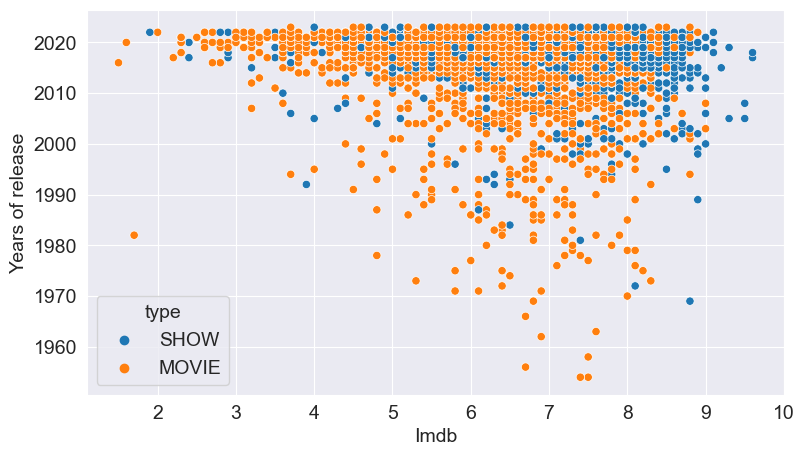

In [39]:

scatter_plot_imdb = sns.scatterplot(x='imdb_score', y='release_year',hue='type', data=netflix_df)
plt.xlabel("Imdb")
plt.ylabel("Years of release")


As you can see the most films from this dataset is rather new (2010 or newer).


Second plot showing dependency between year of realsed and tmdb score

Text(0, 0.5, 'Years of release')

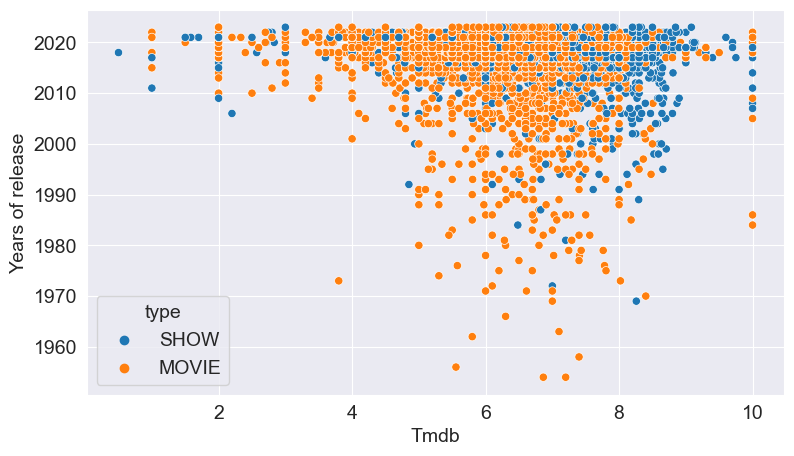

In [40]:

sns.scatterplot(x='tmdb_score', y='release_year', hue='type', data=netflix_df)
plt.xlabel('Tmdb')
plt.ylabel('Years of release')


As you can see the most films from this dataset is rather new (2010 or newer).

The results from both plots are rather similar, therefore we can asssume that imdb score and tmdb score are quite close to each other.

Then to create the third plot we need to create a new variable, which help us to make a pie clear. 

In [121]:

countries_counts = netflix_df['production_countries'].value_counts().head(10)
countries_counts

['US']    1981
['IN']     633
['JP']     278
['KR']     259
['GB']     235
['ES']     177
[]         176
['FR']     121
['MX']     115
['BR']     104
Name: production_countries, dtype: int64

Third plot, which shows which country product the most movies and series

([<matplotlib.patches.Wedge at 0x17b3f594970>,
 [Text(-0.04954473485152267, -1.098883669570393, "['US']"),
  Text(1.0142703741192858, 0.4257412455752016, "['IN']"),
  Text(0.4998801230712533, 0.9798570623097376, "['JP']"),
  Text(0.0639279407662837, 1.0981408008035138, "['KR']"),
  Text(-0.3484481638601299, 1.0433522306021608, "['GB']"),
  Text(-0.6565975959333635, 0.8825415554037824, "['ES']"),
  Text(-0.8694768207502032, 0.6738026848997556, '[]'),
  Text(-0.9996171001947276, 0.45909220533383505, "['FR']"),
  Text(-1.0661375038430292, 0.27083357048075674, "['MX']"),
  Text(-1.0964731347294576, 0.08801513970083238, "['BR']")],
 [Text(-0.027024400828103274, -0.5993910924929415, '48.6%'),
  Text(0.5532383858832467, 0.23222249758647356, '15.5%'),
  Text(0.2726618853115927, 0.5344674885325841, '6.8%'),
  Text(0.034869785872518384, 0.5989858913473711, '6.3%'),
  Text(-0.1900626348327981, 0.5691012166920876, '5.8%'),
  Text(-0.3581441432363801, 0.4813863029475176, '4.3%'),
  Text(-0.47426008

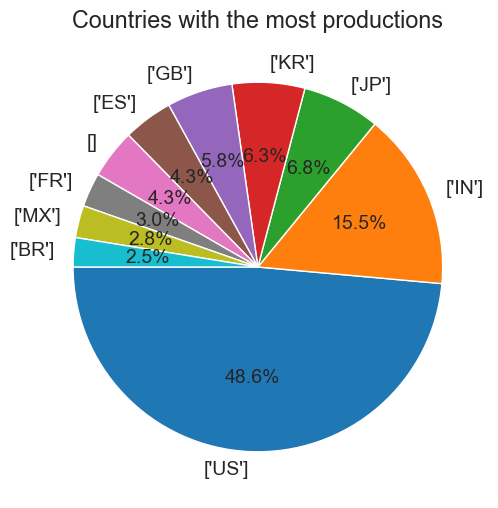

In [122]:

plt.figure(figsize=(12,6))
plt.title('Countries with the most productions')
plt.pie(x=countries_counts, labels=countries_counts.index, autopct='%1.1f%%', startangle=180)

The most movies is created by USA about 48,6 % and India 15,5%, together this two countries make more than half of films nn the whole world

Then to create the forth plot we need to create a new variable, which help us to make a pie clear. 

In [42]:

genres_values = netflix_df['genres'].value_counts().head(10)

Forth plot, bar plot showing which category is the most popular on Netflix

<Axes: title={'center': 'The most popular category'}, ylabel='genres'>

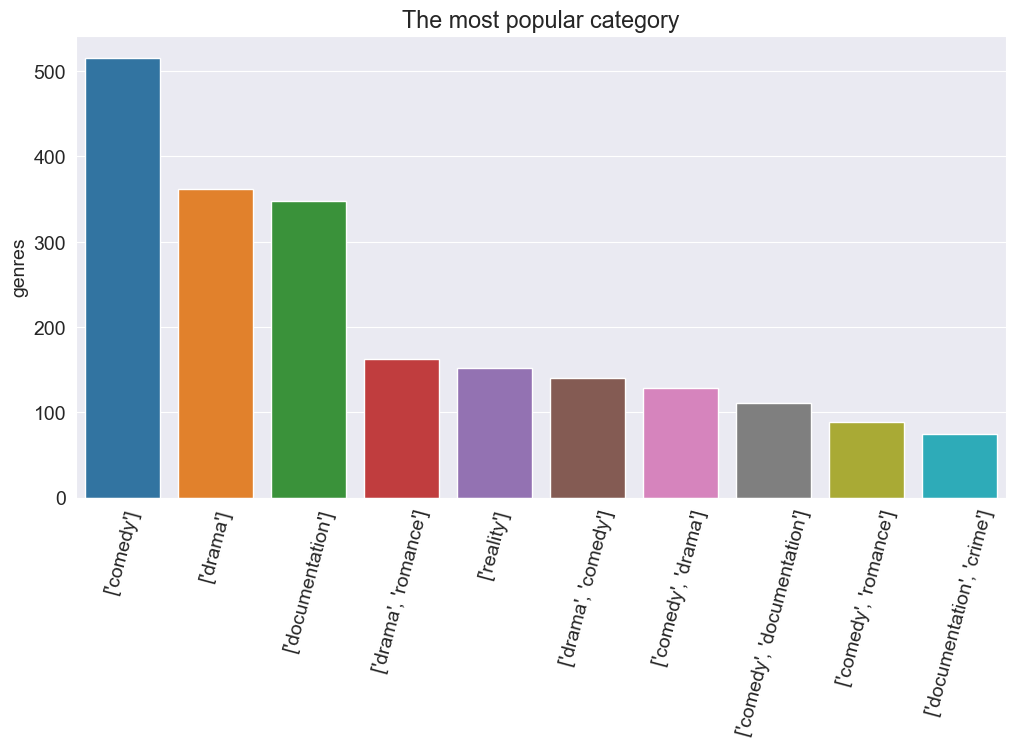

In [44]:

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('The most popular category')
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (9, 5)
sns.barplot(x =genres_values.index  , y = genres_values)


According to the fourth chart, the most popular categories are: comedy, drama and document.

Q&A part

1. Which movie or series is the most popular?

In [45]:

ranking = netflix_df.sort_values('imdb_score', ascending=False)
ranking_imdb = ranking[['type','title', 'imdb_score']]
top_rank_10_imdb = ranking_imdb.head(10)
top_rank_10_imdb 

,type,title,imdb_score
2343,SHOW,Crazy Delicious,9.6
2634,SHOW,#ABtalks,9.6
186,SHOW,Breaking Bad,9.5
529,SHOW,Khawatir,9.5
3186,SHOW,Our Planet,9.3
192,SHOW,Avatar: The Last Airbender,9.3
2640,SHOW,The Chosen,9.3
1062,SHOW,Reply 1988,9.2
2663,SHOW,The Last Dance,9.1
1849,SHOW,My Mister,9.1


<Axes: title={'center': 'The most popular shows and movies'}, xlabel='title', ylabel='imdb_score'>

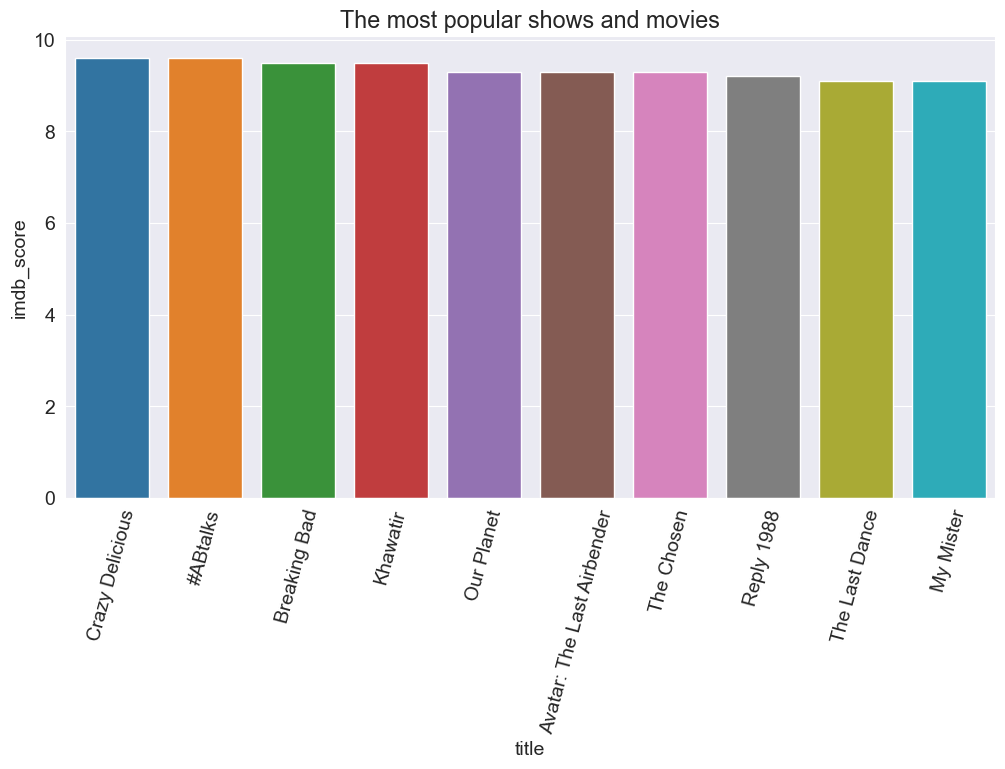

In [51]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('The most popular shows and movies')
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (9, 5)
sns.barplot(x = top_rank_10_imdb.title , y = top_rank_10_imdb.imdb_score)

In [52]:
ranking = netflix_df.sort_values('tmdb_score', ascending=False)
ranking_tmdb = ranking[['type','title', 'tmdb_score', 'genres']]
top_rank_10_tmdb = ranking_tmdb[['type','title', 'tmdb_score']].head(10)
top_rank_10_tmdb

,type,title,tmdb_score
2528,SHOW,Falling in Love Like a Romantic Drama,10.0
455,SHOW,Kung Fu Panda Awesome Secrets,10.0
4201,SHOW,Buddi,10.0
3331,SHOW,I Have A Script,10.0
2517,SHOW,Rainbow Rangers,10.0
4171,MOVIE,Motu Patlu the Superheroes – Super Villains fr...,10.0
4160,SHOW,No hay tiempo para la vergüenza,10.0
73,MOVIE,Duniya,10.0
71,MOVIE,Pyar Ke Do Pal,10.0
2389,SHOW,True: Magical Friends,10.0


<Axes: title={'center': 'The most popular shows and movies'}, xlabel='title', ylabel='tmdb_score'>

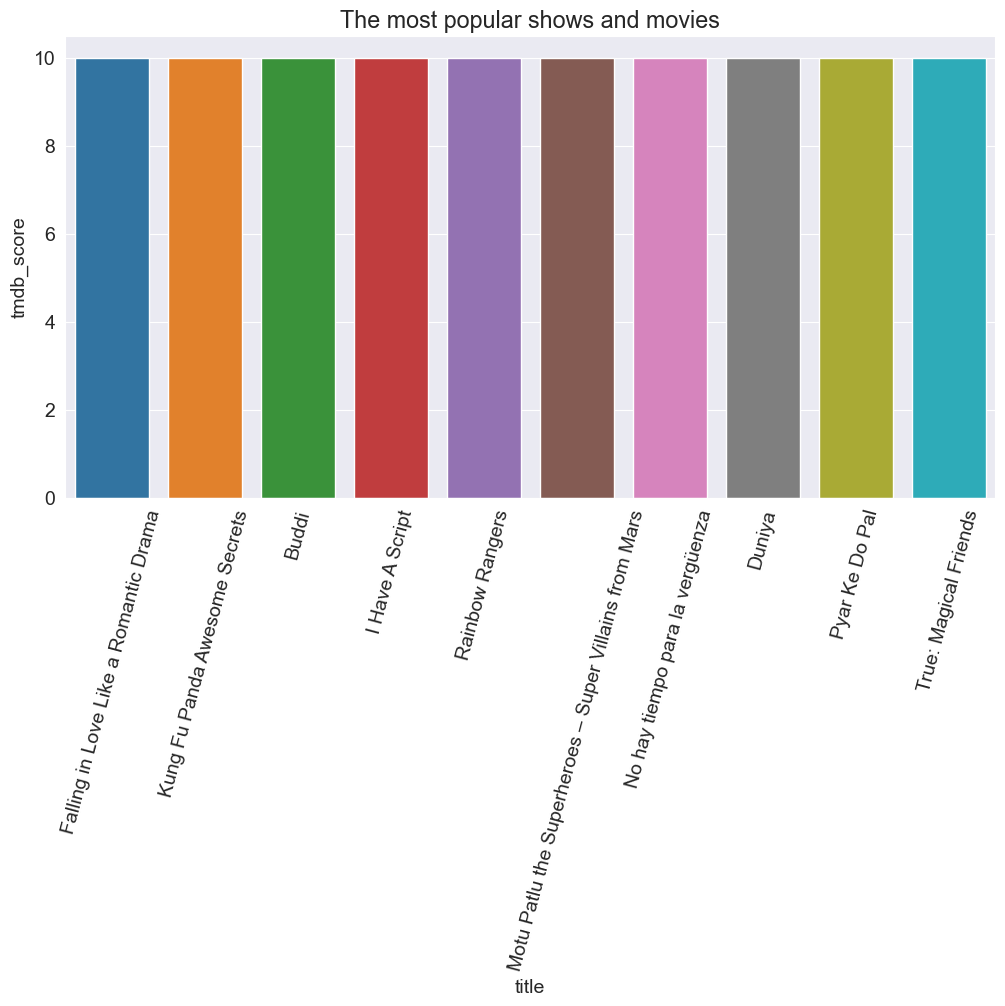

In [53]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('The most popular shows and movies')
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (9, 5)
sns.barplot(x = top_rank_10_tmdb.title , y = top_rank_10_tmdb.tmdb_score)

creating the ranking of the best movies/shows analysed I created this using two different ranking and the results are completly different. Even when I compared first 10 movies with the higest score, any title is in the both list. Accoring to information on Internet, the IMDB is older and has more data.

2. From top 10 IMDB which category is the most popular?

In [72]:

category_popular = ranking_tmdb['genres'].head(10)
counts_pp=category_popular.value_counts()
counts_pp


['reality']                                     2
['action', 'drama']                             2
['action', 'family', 'animation', 'comedy']     1
['comedy', 'family', 'fantasy', 'animation']    1
['drama']                                       1
['animation', 'family', 'fantasy']              1
['animation', 'action', 'comedy']               1
['animation']                                   1
Name: genres, dtype: int64

<Axes: title={'center': 'The most popular category'}, ylabel='genres'>

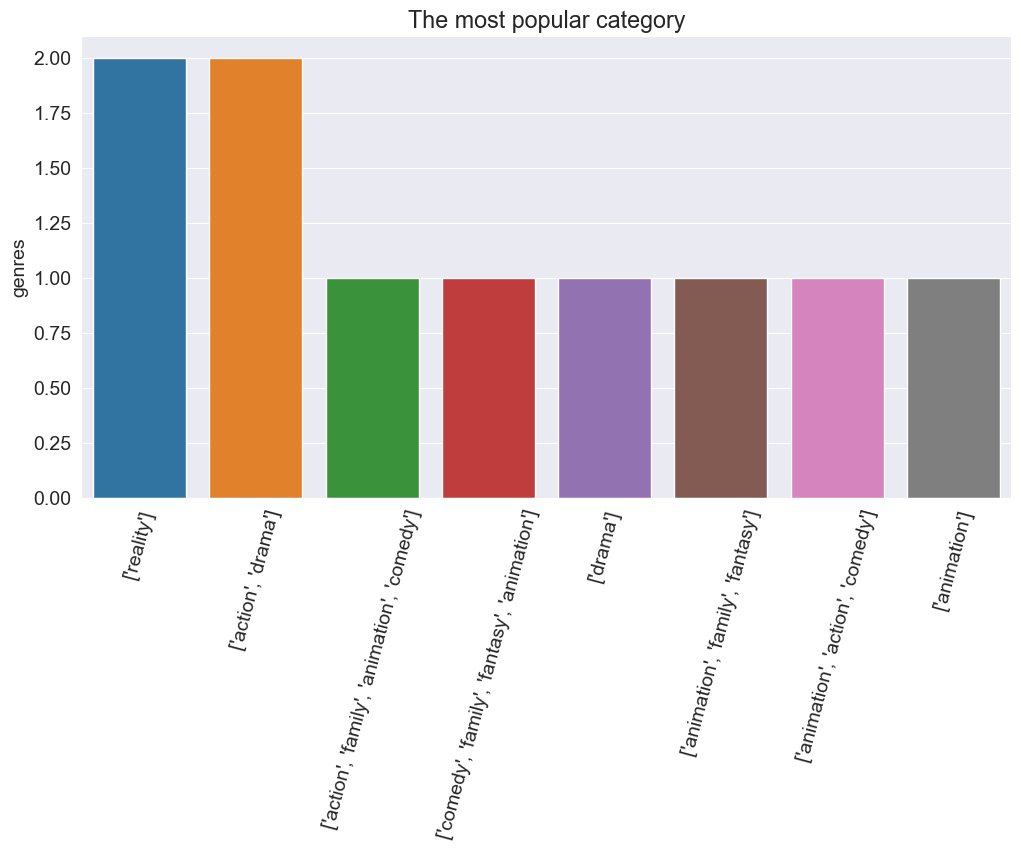

In [73]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('The most popular category')
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (9, 5)
sns.barplot(x = counts_pp.index, y = counts_pp)

Accoring to IMDB ranking the most popular category is reality, animation and action.

3. How many people voted each year in imdb ranking?

In [94]:
grouping_netflix = netflix_df.groupby('release_year')[['imdb_votes']].sum()
grouping_netflix

,imdb_votes
release_year,
1945,0.0
1954,47805.0
1956,703.0
1958,4878.0
1962,312.0
...,...
2019,8620586.0
2020,7548069.0
2021,7967048.0


Text(0.5, 1.0, 'Votes in imdb ranking each year')

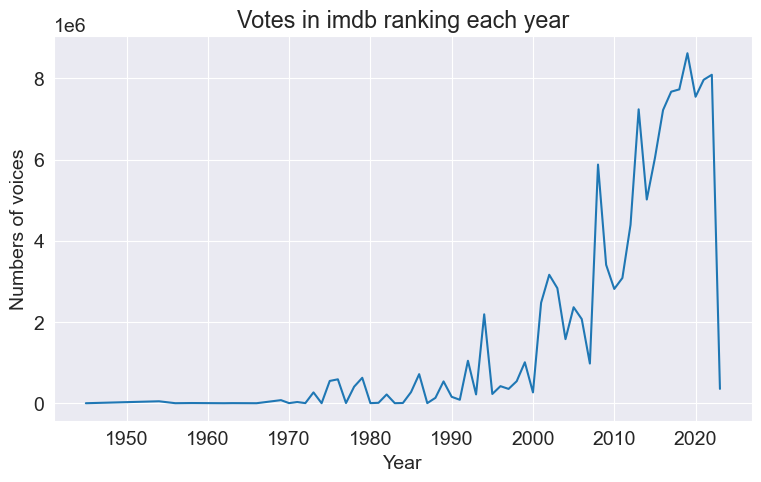

In [110]:
x=grouping_netflix.index
y = grouping_netflix.imdb_votes
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Numbers of voices')
plt.title('Votes in imdb ranking each year')


Probably the IMDB ranking is existing from 1954 year, beacuse earlier the data does not exist. With few exceptions with every year, votes were more and more.

4. How many time will be needed to watch all series and movies? And how this time grows accoring to earlier years?

In [118]:
#time of all series anf movies
time_of_all = netflix_df.runtime.sum()
time_of_all_cum = netflix_df.runtime.cumsum()
print("Sum:", time_of_all/60)
time_of_all_cum/60

Sum: 7812.6


0          0.850000
1          2.833333
2          4.666667
3          6.816667
4          8.800000
           ...     
6132    7806.616667
6133    7808.616667
6134    7809.766667
6135    7811.100000
6136    7812.600000
Name: runtime, Length: 6137, dtype: float64

Text(0.5, 1.0, 'Time to watch all movies and series on Netflix and how it was growing')

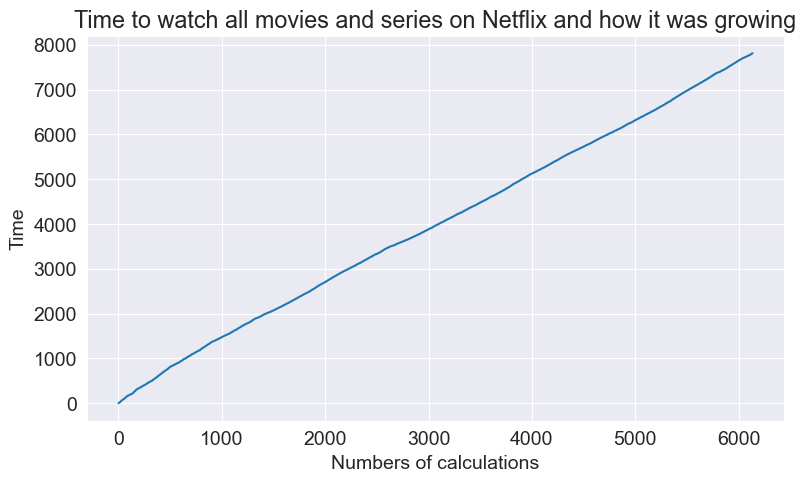

In [120]:

y=time_of_all_cum/60
plt.plot(y)
plt.ylabel('Time')
plt.xlabel('Numbers of calculations')
plt.title('Time to watch all movies and series on Netflix and how it was growing')


The total time is 7812.6 hours. And this type is still growing

Inferences and Conclusion

This analysis was really usefull and interesting. I didn't know all the films from TOP 10 and what is more I didn't know that these rankings (IMDB, TMDB) are so different from itselfs. 